In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_plotly

In [49]:
df = pd.read_csv('../../redemption_trader/processed_data/C:USDJPY_clean.csv',index_col=0)

In [50]:
# re format for prophet model 
# Need a long-position model --> forecast Highs of future candles
# Need a short-positon model ---> forecast Lows of future candles

dp = pd.DataFrame( columns=['ds','y'])

In [55]:
dp['ds'] = pd.to_datetime(df.index).strftime(date_format="%Y-%m-%d %H:%M:%S")
dp['y']  = df['high'].values

In [58]:
model = Prophet(interval_width=0.7)
model.fit(dp)

13:03:55 - cmdstanpy - INFO - Chain [1] start processing
13:08:39 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
import joblib

joblib.dump(model,'prophet_high_model.joblib')

['prophet_high_model.joblib']

In [62]:

dp = pd.DataFrame( columns=['ds','y'])
dp['ds'] = pd.to_datetime(df.index).strftime(date_format="%Y-%m-%d %H:%M:%S")
dp['y']  = df['low'].values

model = Prophet(interval_width=0.7)
model.fit(dp)


joblib.dump(model,'prophet_low_model.joblib')





13:11:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] done processing


['prophet_low_model.joblib']

In [131]:
t = pd.read_csv('./data/tradelog_OS.csv',index_col = 0).head(1)
t['open_time_model'] = pd.to_datetime(t['open_time']).dt.strftime(date_format="%Y-%m-%d %H:%M:%S")
intervals = 24


for s in t.index:
    # print(s)
    time = t.loc[s,'open_time_model']
    # print(time)
    future_dates = pd.DataFrame(index = [i for i in range(24)], columns = ['ds'])
    future_dates['ds'] = [pd.Timestamp(time) + pd.Timedelta(hours=i) for i in range(intervals) ]
    forecast = model.predict(future_dates)
    print(forecast['yhat'])


0     154.136703
1     154.154008
2     154.177608
3     154.201612
4     154.219475
5     154.229830
6     154.237652
7     154.249331
8     154.266243
9     154.283130
10    154.293075
11    154.294463
12    154.293230
13    154.298050
14    154.312806
15    154.333194
16    154.350400
17    154.358189
18    154.356911
19    154.351347
20    154.345354
21    154.338981
22    154.330579
23    154.320968
Name: yhat, dtype: float64


In [96]:
future_dates = model.make_future_dataframe(24, freq = 'H',include_history = False)

/Users/danielosullivan/Desktop/Redemption_Trader/venv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [97]:
forecast  = model.predict(future_dates)

/Users/danielosullivan/Desktop/Redemption_Trader/venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danielosullivan/Desktop/Redemption_Trader/venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


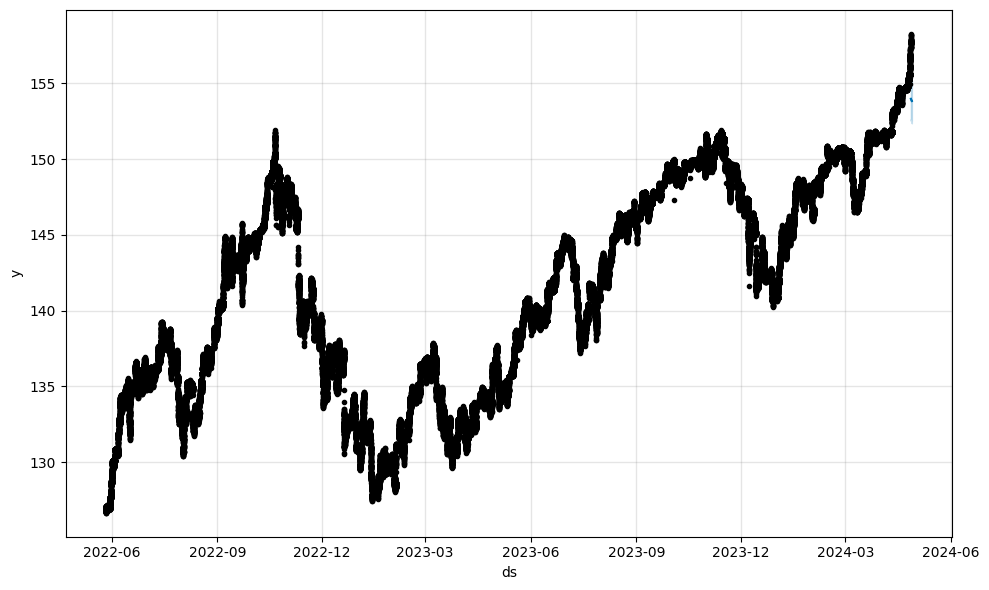

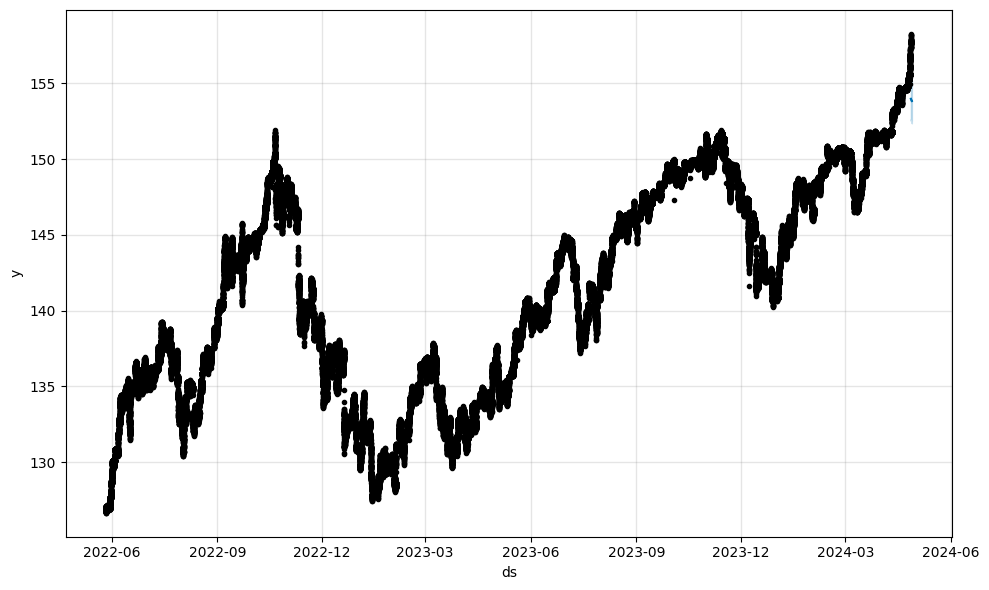

In [84]:
model.plot(forecast, uncertainty=True)